# Importacion de Librerias y Funciones

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import Normalize
from pandas.plotting import parallel_coordinates  #Grafico de lineas individualizando las clases, donde eje x es una escala de valor unica, eje y las variables
#from pandas.plotting import scatter_matrix
from matplotlib import ticker
import squarify   #Permite graficar treemap

# Definición de Funciones

 # Conceptos Básicos

## subplot()

In [2]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

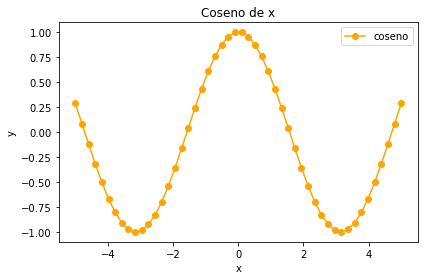

In [3]:
fig, ax = plt.subplots()  # declara "ax" como un "subplot()" de la libreria "plt" que permite generar un conjunto de gráficos

ax.plot(x, y, 'o-', label='coseno', color='orange')   # define el origen de las coordenadas "x" e "y", la etiqueta del gráfico y color
ax.set_title("Coseno de x") # define elnombre del gráfico
ax.set_xlabel("x")  #define la etiqueta del eje "x"
ax.set_ylabel("y")  #define la etiqueta del eje "y"
ax.legend()  #permite visualizar la leyenda de que representa cada curva  

fig.tight_layout()  # permite eliminar la descripción que aparece para los gráficos en la parte superior

In [4]:
z = np.sin(x)  #Declaración de segunda variable

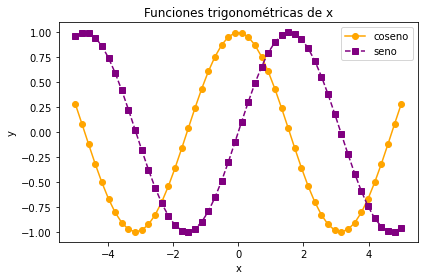

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', label='coseno', color='orange')
ax.plot(x, z, 's--', label='seno', color='purple')  #Visualización de segunda variable en un mismo gráfico
ax.set_title("Funciones trigonométricas de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

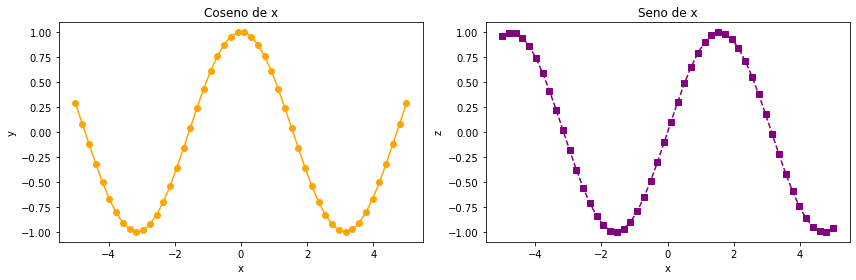

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  #Se agregan coordenadas "1" y "2" que definen el tamaños de las grilla para los gráficos

ax[0].plot(x, y, "o-", color='orange', label='coseno')  #ax[i] Permite asignar una grilla a un determinado par de coordenadas
ax[0].set_title("Coseno de x")  #permite asigna titulo independiente para cada gráfico
ax[0].set_xlabel("x")  #permite asignar etiqueta independiente para el eje de cada gráfico
ax[0].set_ylabel("y")

ax[1].plot(x, z, "s--", color='purple', label='seno')
ax[1].set_title("Seno de x")
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")

fig.tight_layout()

## Gráfico de Dispersión

In [7]:
df_scatter = pd.read_csv("https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/rosling.csv")
#df_scatter.head()

In [8]:
#Define tagname para columnas con datos de ejes coordenados
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'

In [9]:
size = 'Population' #define columa con tamaño de la problacion
max_population = df_scatter[size].max() #identifica el valor máximo de la columna
df_scatter['radius'] = 2000 * df_scatter[size] / max_population  #normaliza los valores de acuerdo al valor máximo de los datos

In [10]:
#Asigna un colo por continente
df_scatter['color'] = df_scatter['Continent'].map({
    'Africa': '#e41a1c',
    'Asia': '#377eb8',
    'Australia': '#4daf4a',
    'North America': '#984ea3',
    'South America': '#ff7f00',
    'Europe': '#a65628'
})
df_scatter['color'].head(10)

0    #e41a1c
1    #e41a1c
2    #e41a1c
3    #377eb8
4    #e41a1c
5    #e41a1c
6    #e41a1c
7    #e41a1c
8    #e41a1c
9    #e41a1c
Name: color, dtype: object

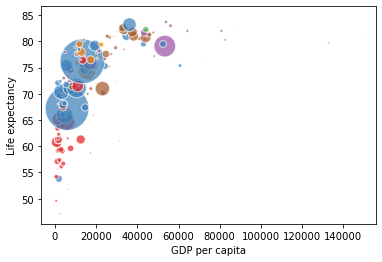

In [11]:
#"s" define el radio del punto del gráfico, "c" el color de las esferas, "alpha" la intensidad y "edgecolor" el color del controrno de las esferas
ax = df_scatter.plot.scatter(x=xlabel, y=ylabel, s='radius', c='color', alpha=.7, edgecolor='white')

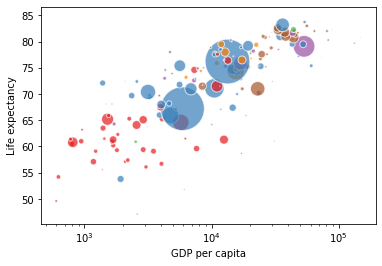

In [12]:
ax = df_scatter.plot.scatter(x=xlabel, y=ylabel, s='radius', c='color', alpha=.7, edgecolor='white')
ax.set_xscale('log') #como la gráfica tiene una curva logaritmica, se puede cambiar la escala del eje para tener una mejor visualización

 ## Gráfico de Barras

In [13]:
df_bars = pd.read_csv("https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/ingresos.csv")
#df_bars.head()

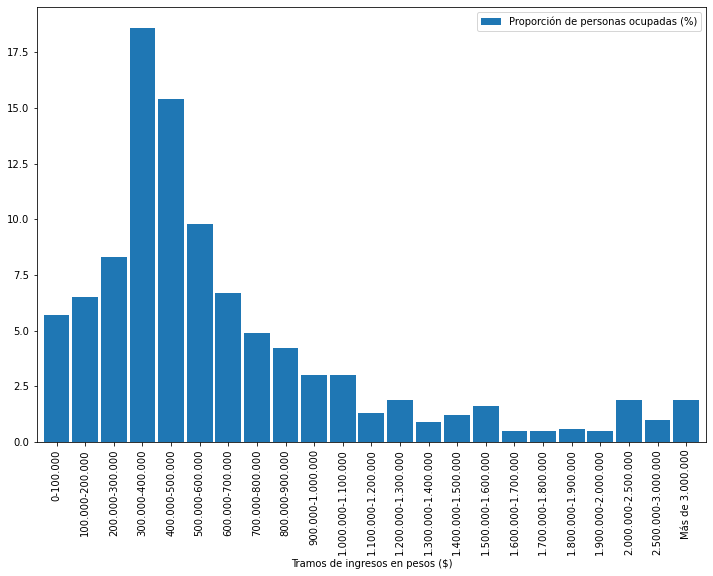

In [14]:
xlabel = 'Tramos de ingresos en pesos ($)'
ylabel = 'Proporción de personas ocupadas (%)'

ax = df_bars.plot.bar(x=xlabel, y=ylabel, figsize=(12,8), width=0.9) #width permite definir el ancho de la barra

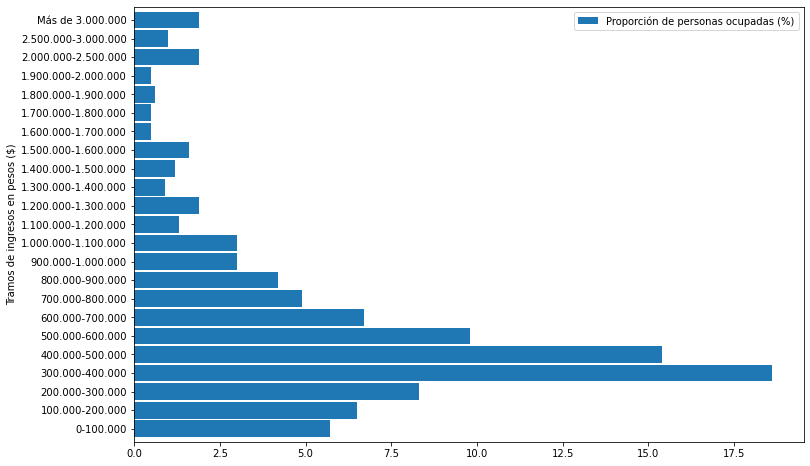

In [15]:
ax = df_bars.plot.barh(x=xlabel, y=ylabel, figsize=(12,8), width=0.9) #barh permite definir la orientación horizontal de las barras

Los dataframe de pandas también pueden recibir como argumento un axes que nosotrxs ya hayamos creado, lo que nos permite ubicarlos justo en el lugar que queremos. Por ejemplo, podemos crear una grilla de axes y ubicar nuestros gráficos ahí.

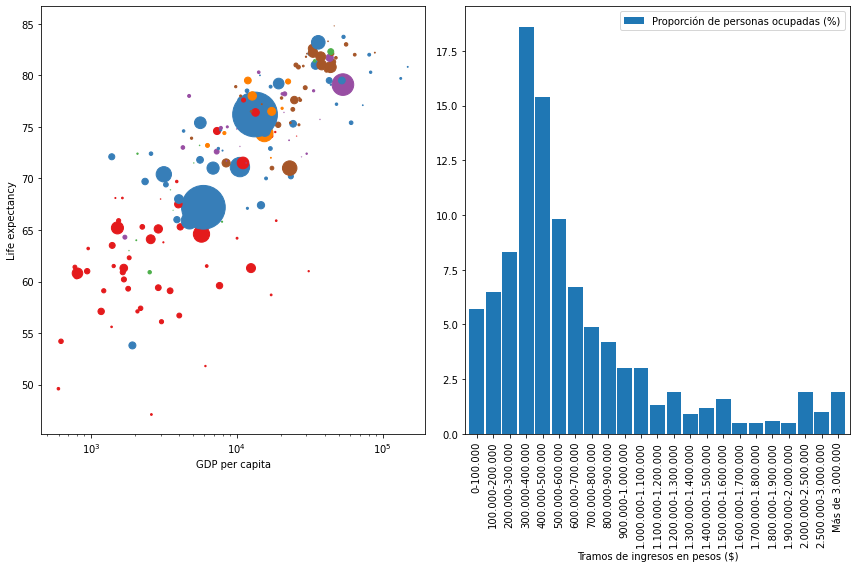

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_scatter.plot.scatter(x='GDP per capita', y='Life expectancy', s='radius', c='color', ax=ax[0])
df_bars.plot.bar(x=xlabel, y=ylabel, figsize=(12,8), width=0.9, ax=ax[1])
ax[0].set_xscale('log')

fig.tight_layout()

## Gráfico de Lineas
### Ejemplo: Muertes Covid

In [17]:
deaths_file = 'https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/muertes_deis/muertes_deis_rm.csv'
deaths_data = pd.read_csv(deaths_file)

In [18]:
#Se separan datos de una comuna, se elimina la columna de ombres de comunas y se fijan los años como index de filas.
comuna = "Cerro Navia"
data = (deaths_data[deaths_data['comuna'] == comuna].drop(['comuna'], axis=1).set_index('año'))

In [19]:
min_year = data.index.min()
max_year = data.index.max()
    
viridis = cm.get_cmap('viridis') #"cm" es una funcion de matplotlib asociada al mapa de color disponibles
norm = Normalize(vmin=min_year, vmax=max_year) #Se utiliza para la leyecna

In [20]:
# Funcion que permite definir un color gradualmente para cada año
def get_color(yr,min_year,max_year):
    color_number = (yr - min_year) / (max_year - min_year)
    return viridis(color_number)

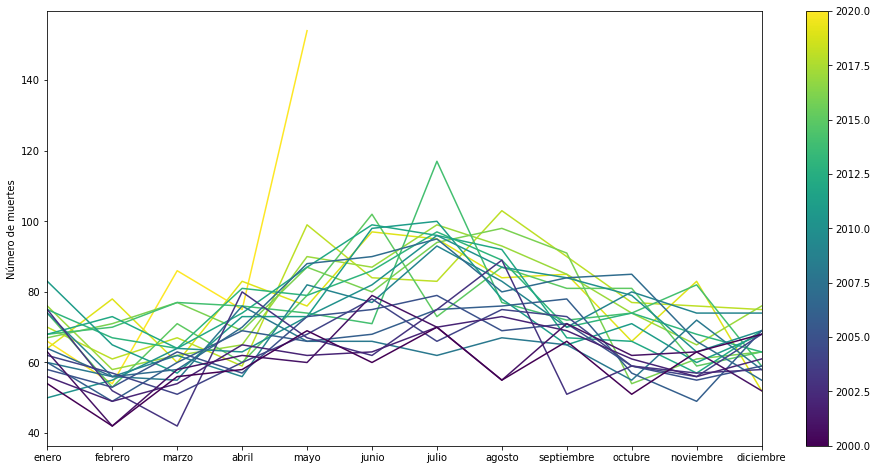

In [21]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax, c=get_color(year,min_year,max_year))
    
ax.set(xlim=(0,11), #Define que el origen del eje x sea el primer dato(enero)
       xticks=np.arange(0, 12), #Define el numero de divisiones del eje x
       xticklabels = data.keys(), #Asigna los nombres a las divisiones del eje x
       ylabel="Número de muertes")
# ax.legend(ncol=2)  #indica la cantidad de columnas para la leyenda
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax) #Genera leyenda como barra degradada
    
plt.show()

#Los parametros de la función tambien pueden ajustarse de la siguiente forma: x.set_xlim(0, 11)

## Mapa de Calor
### Ejemplo: Muertes Covid

In [22]:
#Definir tamaño de las grillas del subplot de acuerdo al dataset
comunas = deaths_data['comuna'].unique()
ncomunas = len(comunas)
cols = 4
rows = int(ncomunas/cols)

In [23]:
#Función para graficar los datos individuales de cada comuna
def plot_comuna(comuna, ax):
    data = (
        deaths_data[deaths_data['comuna'] == comuna]
            .drop(['comuna'], axis=1)
            .set_index('año')
        )
    sns.heatmap(data, ax=ax, cmap='YlGnBu', xticklabels=3, yticklabels=False, vmin=0, vmax=310) #"cmap" permite definir la graduación y tonalidad del mapa."vmin" y"vmax permiten normalizar todos los gráficos.
    ax.set_title(comuna, fontsize=24)

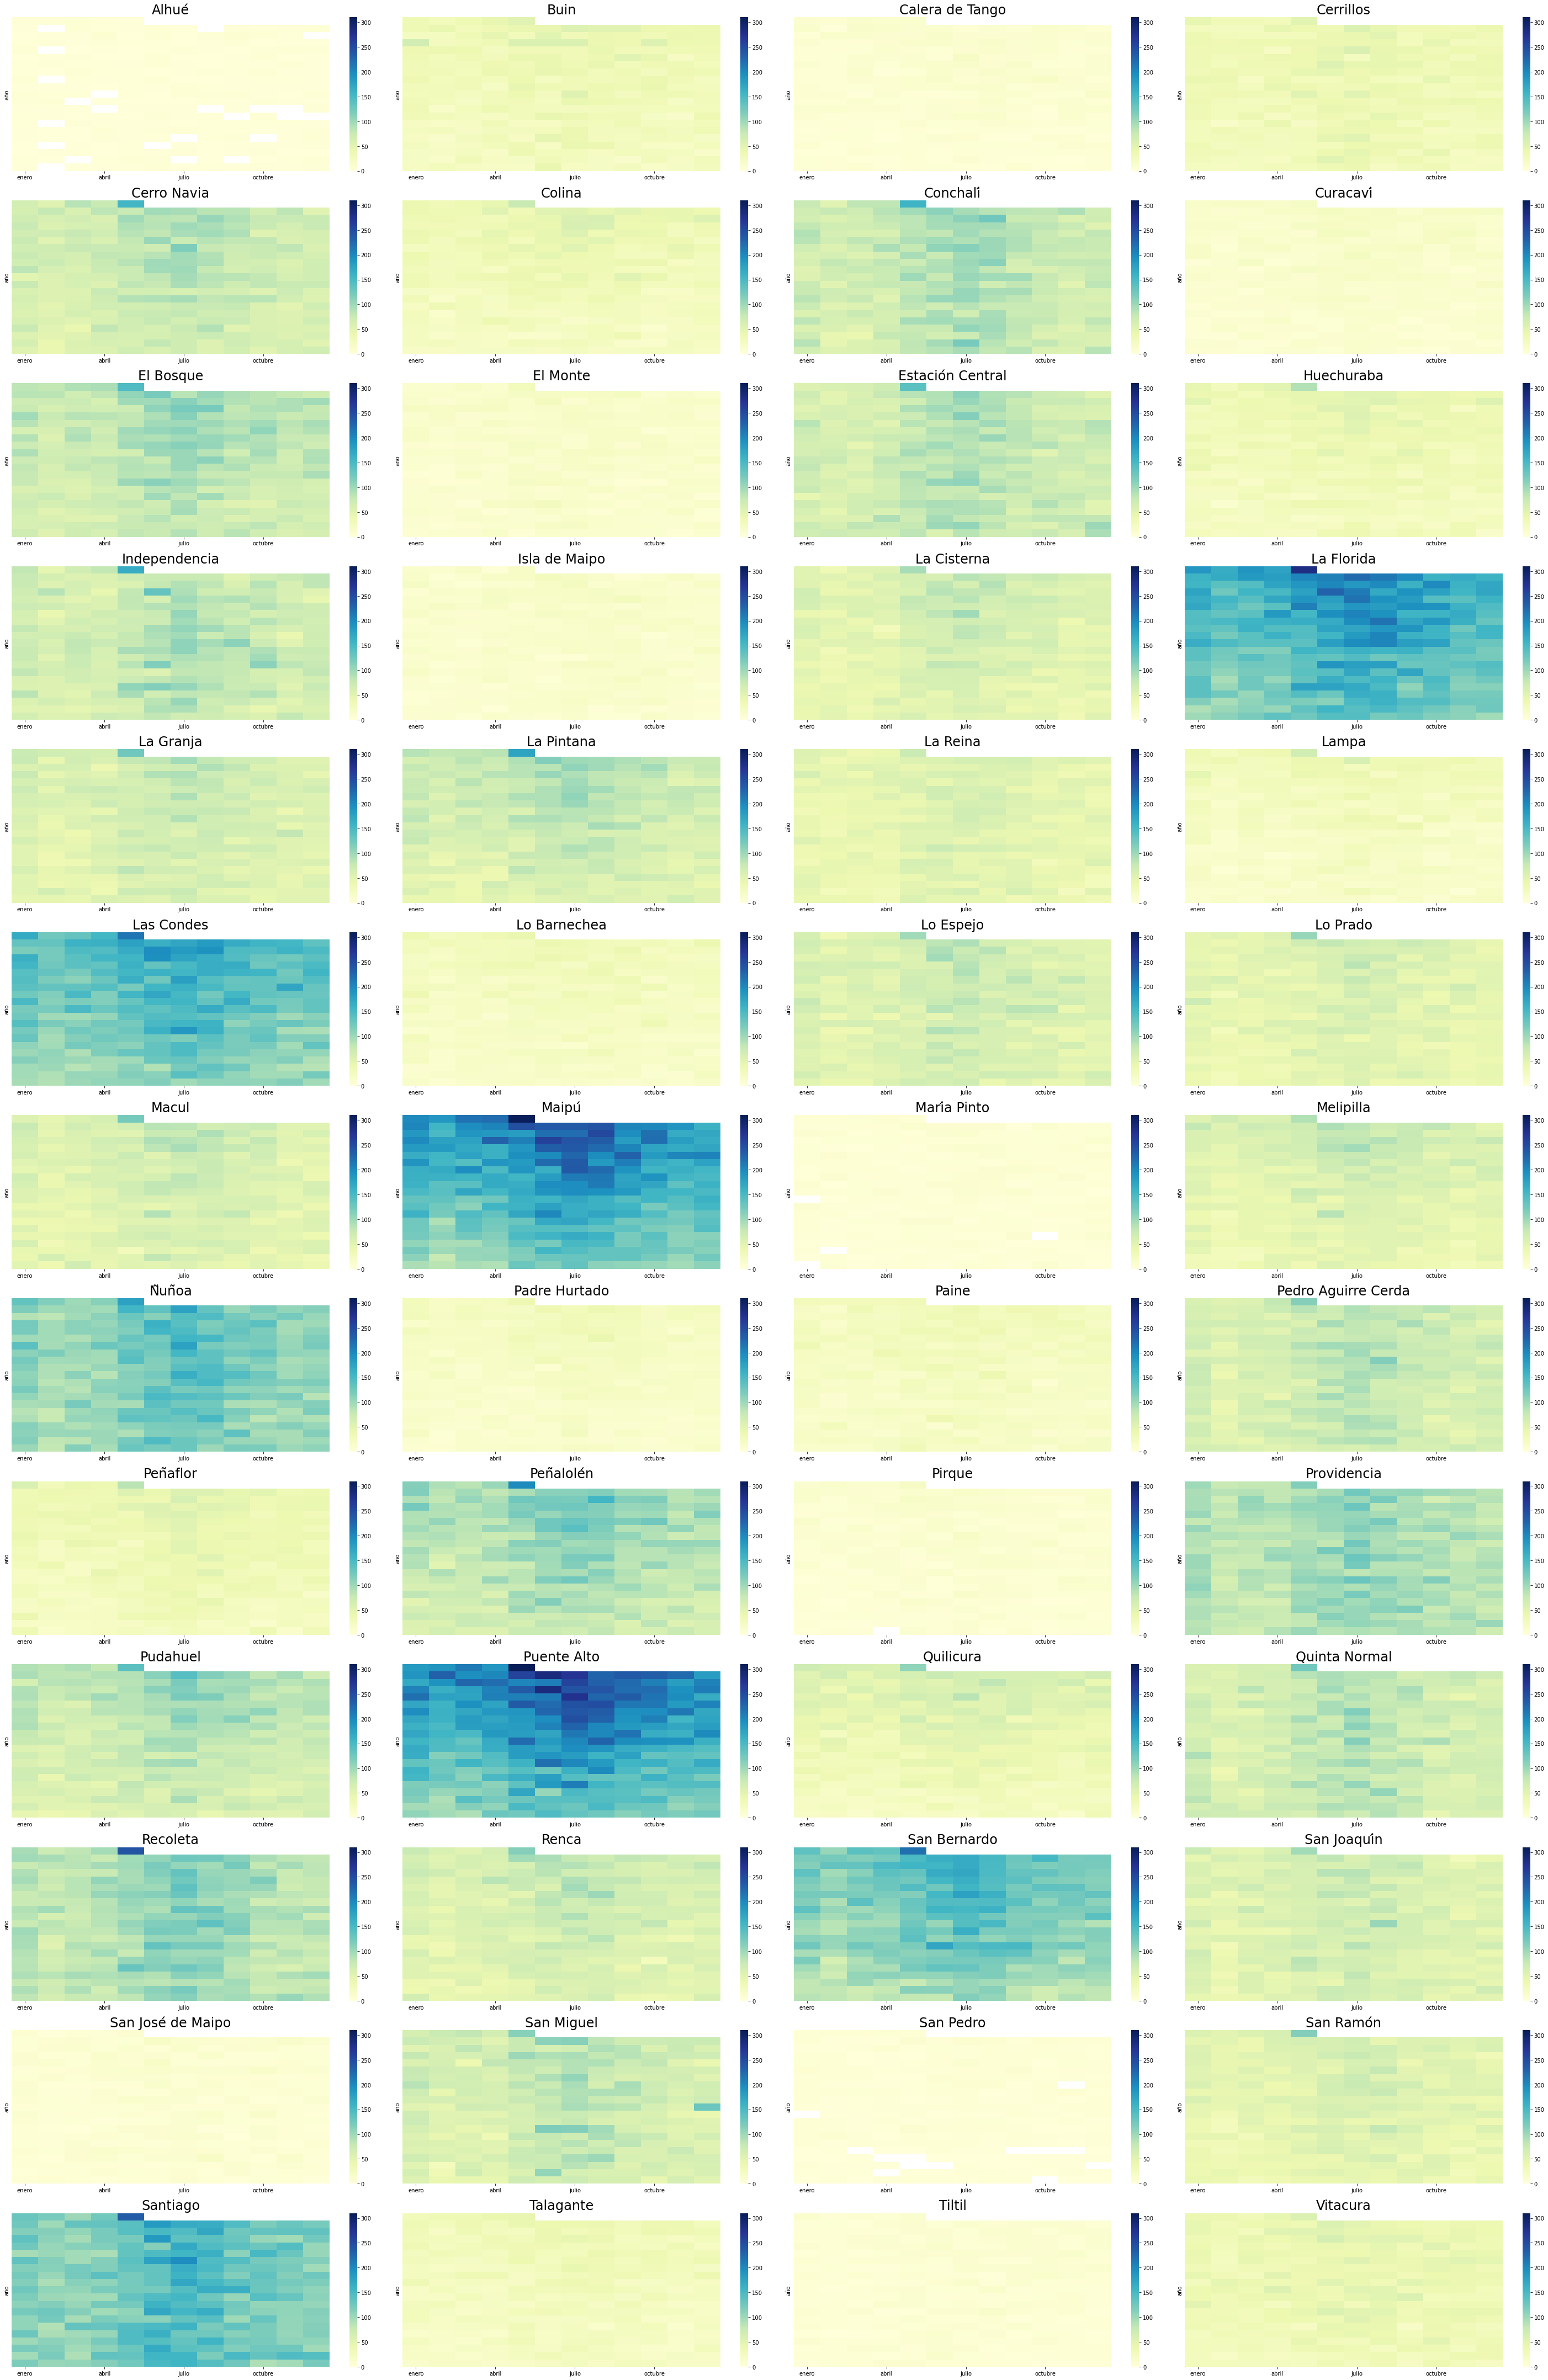

In [24]:
fig, ax = plt.subplots(rows, cols, figsize=(40,60))

for idx_comuna, comuna in enumerate(comunas): #accede al index del listado de comunas
    row = int(idx_comuna / cols) #define la fila
    col = idx_comuna % cols #con el modulo de la division se define la columna
    plot_comuna(comuna, ax[row][col])
    
fig.tight_layout()

## Gráfico de Barras Variante "Stack"

In [25]:
path = 'https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)

In [26]:
df['Partido'] = df['Partido'].str.title() #
df['Total'] = df['Mujeres'] + df['Hombres'] #Agrega clumna con total por partido
df['Mujeres (%)'] = df['Mujeres'] / df['Total'] * 100 #Porcentaje mujeres
df['Hombres (%)'] = df['Hombres'] / df['Total'] * 100 #Porcentaje hombres
df.set_index('Partido', inplace=True)  #Define columna de nombres de partidos como index

In [27]:
percents = ['Mujeres (%)', 'Hombres (%)']  #genera un dataframe solo con los valores en porcentajes de las columnas hombres y mujeres
df_sorted = df[percents].sort_values(by=percents[0], ascending=False) #Ordena las filas de menor a mayor
df_sorted

,Mujeres (%),Hombres (%)
Partido,,
Partido Nacional Ciudadano,61.465721,38.534279
Union Democrata Independiente,59.622701,40.377299
Igualdad,59.476296,40.523704
Nuevo Tiempo,58.274232,41.725768
Ciudadanos,55.433658,44.566342
Partido Progresista,55.329719,44.670281
Nueva Clase Media,53.925501,46.074499
Ecologista Verde,53.442603,46.557397
Renovacion Nacional,52.813831,47.186169


In [28]:
#Función que permite eliminar los bordes del gráfico
def hide_border(ax):
    ax.spines['bottom'].set_visible(False) #Linea inferior
    ax.spines['left'].set_visible(False) #Linea izquierda
    ax.spines['right'].set_visible(False) #Linea derecha
    ax.spines['top'].set_visible(False) #Linea superior

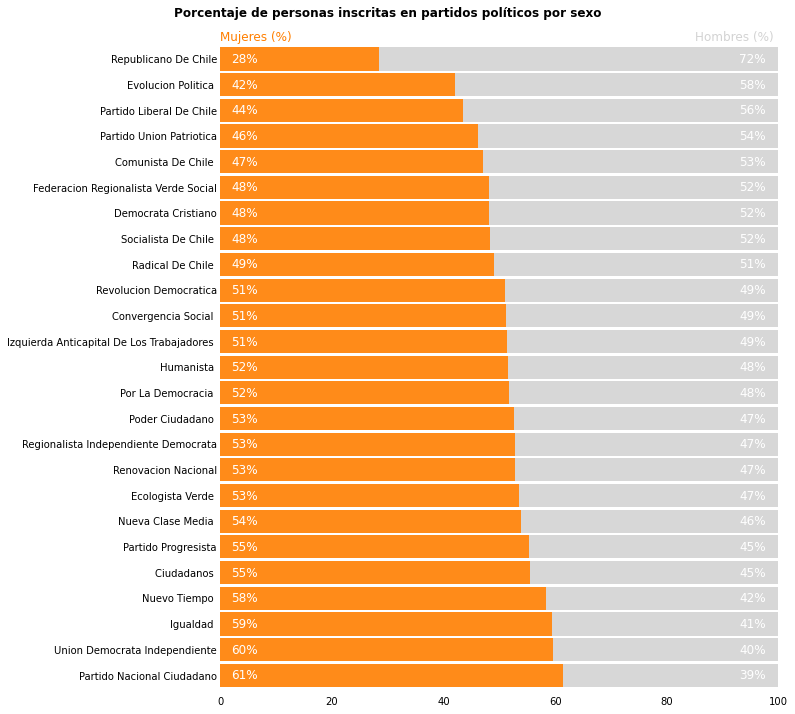

In [29]:
fontsize=12
colors = ['#ff7f00', '#d3d3d3']  #Define los colores

ax = df_sorted.plot.barh(stacked=True, #Graficos complementarios
                         figsize=(10, 12), 
                         legend=False, width=0.9, alpha=0.9, 
                         xlim=(0, 100),  #Limites del rango de valores
                        color=colors)

hide_border(ax)   #Ocultar bordes
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')  #Etiqueta eje y en blanco
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", 
             pad=24, # Espacio entre el titulo y el siguiente texto
             fontweight=700) #tamaño d ela letra
ax.title.set_position([.3, 1.03])  #Posiciona el titulo
ax.text(0, df_sorted.shape[0]-0.3, #ubicacion horizontal, posicion vertica,
        percents[0], color=colors[0], fontsize=fontsize)  #nombre de la variable, color del texto, tamaño texto 
ax.text(85, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

#ax.xaxis.set_ticks([])
for p in ax.patches:  #Define donde se ubicara el dato del valor representado
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 93
    ax.annotate(str(int(round(p.get_width()))) + "%", #Define texto del valor en las barras
                (xpos, p.xy[1] + 0.3), #define posicion horizontal, vertical
                color='white', fontsize=fontsize)

plt.show()

# Datos Multidimensionales, de Jerarquía y de Flujo

## Datos multidimensionales

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/fbecerra/ex2/master/data/exoplanets.csv")
df = data[['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST', 'PLANETDISCMETH']].dropna().reset_index(drop=True)
df.head()

,MASS,R,BMV,MSTAR,RSTAR,TEFF,A,PER,ECC,DIST,PLANETDISCMETH
0,7.692340,1.281000,0.460000,1.310,1.310,6475.0,0.036769,2.243752,0.091000,160.000,Transit
1,0.026665,0.170247,0.900000,0.912,0.944,5466.0,0.045370,3.696122,0.000000,290.000,Transit
2,0.617485,1.020000,0.990000,0.920,0.870,5190.0,0.039949,3.039577,0.000000,204.000,Transit
3,0.300272,1.070000,0.540000,1.010,1.060,5800.0,0.052109,4.322482,0.000000,242.131,Transit
4,0.000000,0.116766,0.599999,0.690,0.640,4925.0,0.055279,5.714932,0.070711,368.000,Transit


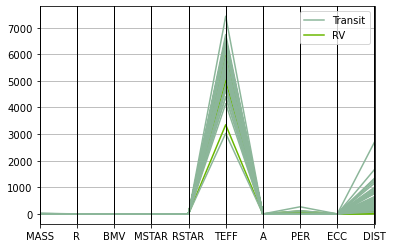

In [31]:
ax = parallel_coordinates(df, 'PLANETDISCMETH')

In [32]:
#Función que permite generarvarios subplots para normalizar las graficas en escalas individuales acordes a cada variable

def plot_parallel_coordinates(df, cat_col, cols, colours):
    
    x = [i for i, _ in enumerate(cols)]

    # Create (X-1) sublots along x axis
    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

    # Get min, max and range for each column
    # Normalize the data for each column
    min_max_range = {}
    for col in cols:
        min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    # Plot each row
    for i, ax in enumerate(axes):
        for idx in df.index:
            mpg_category = df.loc[idx, cat_col]
            ax.plot(x, df.loc[idx, cols], colours[mpg_category])
        ax.set_xlim([x[i], x[i+1]])

    # Set the tick positions and labels on y axis for each plot
    # Tick positions based on normalised data
    # Tick labels are based on original data
    def set_ticks_for_axis(dim, ax, ticks):
        min_val, max_val, val_range = min_max_range[cols[dim]]
        step = val_range / float(ticks-1)
        tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
        norm_min = df[cols[dim]].min()
        norm_range = np.ptp(df[cols[dim]])
        norm_step = norm_range / float(ticks-1)
        ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
        ax.yaxis.set_ticks(ticks)
        ax.set_yticklabels(tick_labels)

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks=6)
        ax.set_xticklabels([cols[dim]])


    # Move the final axis' ticks to the right-hand side
    ax = plt.twinx(axes[-1])
    dim = len(axes)
    ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[-2], cols[-1]])


    # Remove space between subplots
    plt.subplots_adjust(wspace=0)

    # Add legend to plot
    plt.legend(
        [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
        df[cat_col].cat.categories,
        bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

    return fig, ax

In [33]:
cat_col = 'PLANETDISCMETH'
cols = ['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST']

colours = ['#2e8ad8', '#cd3785']
df[cat_col] = df[cat_col].astype('category')

colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}

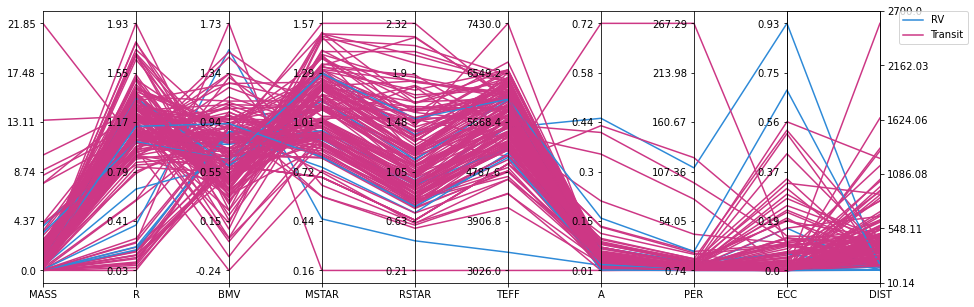

In [34]:
fig, ax = plot_parallel_coordinates(df, cat_col, cols, colours)

## Matrices

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


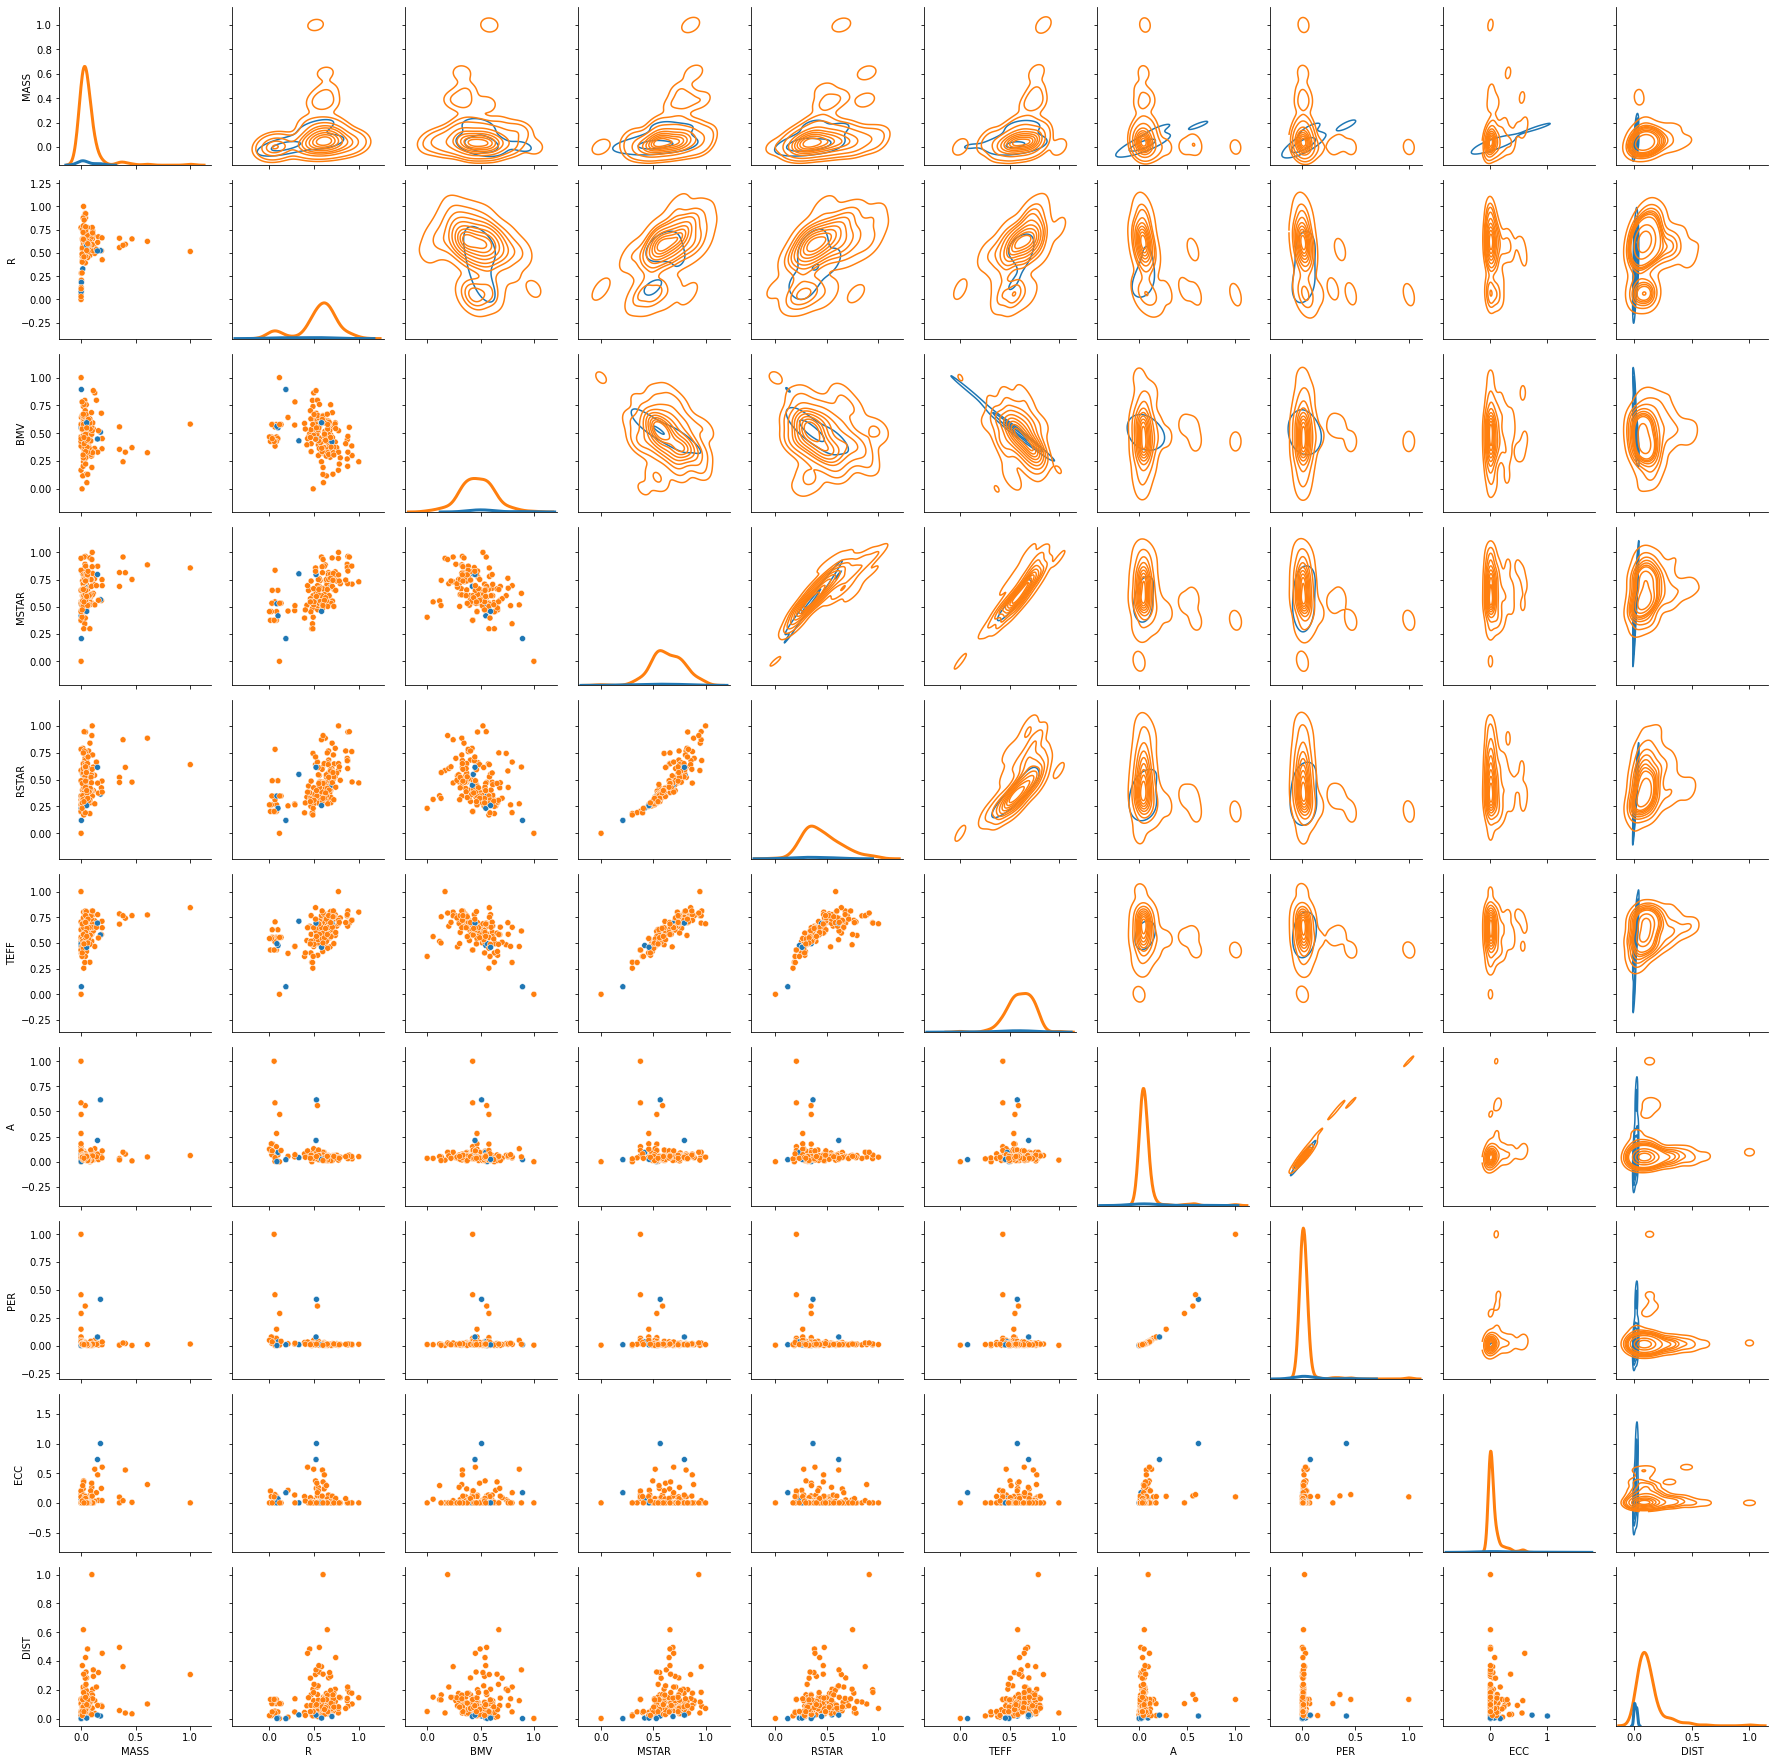

In [35]:
g = sns.PairGrid(df, hue=cat_col)  #Define la cantidad y tamaño de las grillas
g.map_lower(sns.scatterplot)   #Imprime grafico de dispersión bajo la diagonal
g.map_diag(sns.kdeplot, lw=3, legend=False)  #Grafica la distribución de las muestras para las variables en la diagonal
g.map_upper(sns.kdeplot)  #Densidad de probabilidad para dos variables en la parte superior(similar a dispersión, pero encierra areas donde es probable se distribuyan las muestras)
plt.show()

## Jerarquia

In [40]:
df = pd.read_excel('../data/aportes_gastos_plebiscito.xlsx', sheet_name=['Aportes', 'Propaganda por Medios Digitales', 'Medios'])

FileNotFoundError: [Errno 2] No such file or directory: '../data/aportes_gastos_plebiscito.xlsx'

NameError: name 'aportes' is not defined

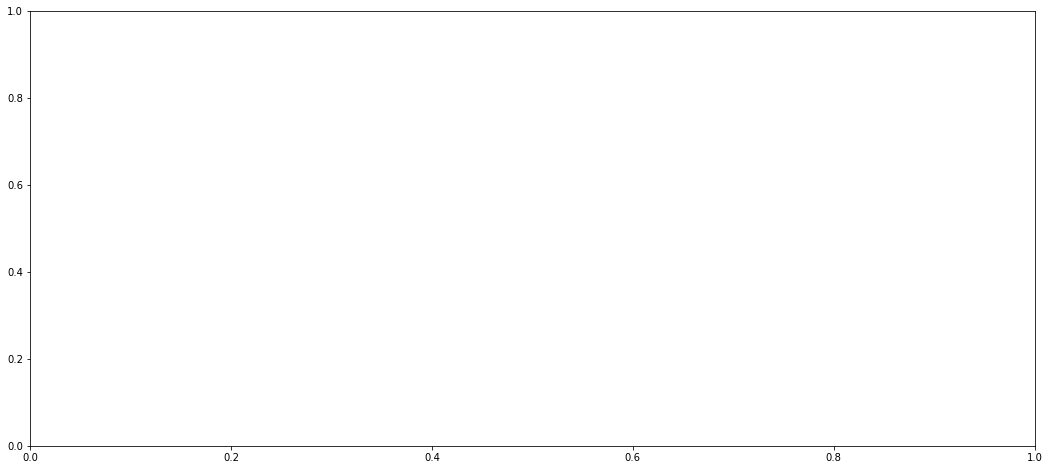

In [39]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))

squarify.plot(sizes=aportes['aporte'], color=aportes['color'], label=aportes['nombre'], alpha=0.8, ax=ax,
             text_kwargs={'fontsize': 12, 'color': 'white', 'weight': 'bold'}, edgecolor='#d2d2d2')
plt.axis('off')
plt.show()